In [236]:
# importing packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

data = pd.read_csv('./Data/train_2.csv')

np.random.seed(seed=1)
mask = np.random.rand(data.shape[0]) < 0.7
train = data[mask]
test = data[~mask]

train.to_csv('./Data/train_clean_split.csv')
test.to_csv('./Data/test_clean_split.csv')

x_train = train[['sex', 'age', 'high_BP_2', 'heart_condition_detected_2017_2', 'married_2', 'average_blood_sugar_2', 'BMI_3', 'smoker_status_2', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD_2']].copy()
y_train = train[['stroke_in_2018']].copy()
train.describe()

,Unnamed: 0,Unnamed: 0.1,id,sex,age,high_BP_2,heart_condition_detected_2017_2,married_2,average_blood_sugar,average_blood_sugar_2,BMI,BMI_2,smoker_status_2,TreatmentA,TreatmentB,TreatmentC,TreatmentD_2,treated,stroke_in_2018,BMI_3
count,24389.000000,24389.000000,24389.000000,24389.000000,24389.000000,24389.000000,24389.000000,24389.000000,24353.000000,24389.000000,24389.000000,24389.000000,24389.000000,24389.000000,24389.000000,24389.000000,24389.000000,24389.000000,24389.000000,24389.000000
mean,17423.001722,17444.176309,21656.621305,0.408750,45.272781,0.093362,0.047644,0.642708,109.173073,2.140186,29.848866,3.512813,1.175161,0.008692,0.014146,0.008610,0.010251,0.033663,0.019394,30.887460
std,10077.774222,10090.457572,12536.501093,0.491946,22.573450,0.290945,0.213017,0.479212,43.287888,0.550385,9.514981,1.465911,1.032197,0.092829,0.118094,0.092394,0.100727,0.180363,0.137908,7.646999
min,0.000000,0.000000,3.000000,0.000000,3.080000,0.000000,0.000000,0.000000,59.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.600000
25%,8645.000000,8656.000000,10791.000000,0.000000,27.000000,0.000000,0.000000,0.000000,81.890000,2.000000,25.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.700000
50%,17429.000000,17449.000000,21661.000000,0.000000,47.000000,0.000000,0.000000,1.000000,96.200000,2.000000,29.800000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.870589
75%,26165.000000,26197.000000,32546.000000,1.000000,63.000000,0.000000,0.000000,1.000000,116.790000,2.000000,35.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000
max,34830.000000,34871.000000,43399.000000,2.000000,85.000000,1.000000,1.000000,1.000000,295.650000,4.000000,99.900000,6.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.900000


Text(0.5,1,'No Stroke (0) vs. Stroke (1)')

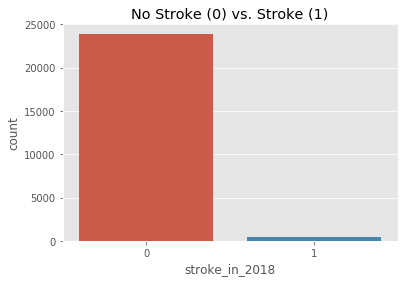

In [237]:
sns.countplot('stroke_in_2018', data = train)
plt.title('No Stroke (0) vs. Stroke (1)')

Text(0.5,1,'No Stroke (0) vs. Stroke (1)')

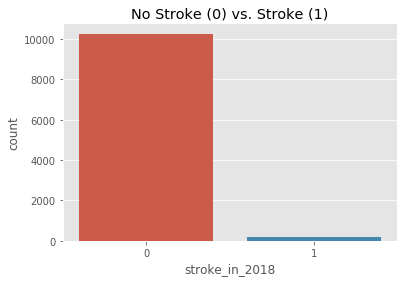

In [238]:
sns.countplot('stroke_in_2018', data = test)
plt.title('No Stroke (0) vs. Stroke (1)')

In [264]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# random oversampling
ros = RandomOverSampler(random_state=0)
#x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# applying SMOTE to our data and checking the class counts
x_resampled, y_resampled = SMOTE().fit_resample(x_train, y_train)
print(len(x_resampled))

47832


In [240]:
from ModelsTest import runTests
runTests(x_resampled, y_resampled, test_type='cv', data_used=1)

      Model        |       Time       | Accuracy (train) | Accuracy (test) 
----------------------------------------------------------------------------
  Decision Tree    |      2.185       |      99.94       |      98.99      
   Gaussian NB     |      0.307       |      65.55       |      65.55      
  Multinomial NB   |      0.211       |      74.78       |       74.8      
  LogRegression    |      1.153       |      78.55       |      78.67      
Nearest Neighbors  |      3.462       |      98.27       |      97.19      


In [266]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics

x_test = test[['sex', 'age', 'high_BP_2', 'heart_condition_detected_2017_2', 'married_2', 'average_blood_sugar_2', 'BMI_3', 'smoker_status_2', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD_2']].copy()
y_test = test[['stroke_in_2018']].copy()

def run_model(algo_name):
    algos = {'lr': LogisticRegressionCV(cv=10, class_weight='balanced', scoring='roc_auc'), 'knn': KNeighborsClassifier(n_neighbors =10), 'svm': svm.SVC()}
    algo = algos[algo_name]
    algo.fit(x_resampled, y_resampled)
    pred_train_lr = algo.predict(x_resampled)
    print(round(metrics.accuracy_score(y_resampled, pred_train_lr) * 100, 2))
    print(metrics.confusion_matrix(y_resampled, pred_train_lr))
    print()

    pred_test_lr = algo.predict(x_test)
    print(round(metrics.accuracy_score(y_test, pred_test_lr) * 100, 2))
    print(pred_test_lr.sum())
    print(metrics.confusion_matrix(y_test, pred_test_lr))
    print(metrics.f1_score(y_test, pred_test_lr, average='binary'))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_test_lr)
    print(metrics.auc(fpr, tpr))
    print()
    return algo

lr_fit = run_model('lr')
#run_model('knn')
#run_model('svm')

79.5
[[17959  5957]
 [ 3848 20068]]

74.97
2709
[[7691 2572]
 [  42  137]]
0.09487534626038781
0.7573770723818327



In [255]:
import xgboost as xgb

xgb2 = xgb.XGBClassifier(
 learning_rate =0.7,
 n_estimators=100,
 max_depth=5,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=2,
 seed=27)

train_model7 = xgb2.fit(x_resampled, y_resampled)
pred7 = train_model7.predict(x_test.to_numpy())
print("Accuracy for model 7: %.2f" % (metrics.accuracy_score(y_test, pred7) * 100))
print(metrics.confusion_matrix(y_test, pred7))
print(metrics.f1_score(y_test, pred7, average='binary'))
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred7)
print(metrics.auc(fpr, tpr))

Accuracy for model 7: 90.07
[[9333  930]
 [ 107   72]]
0.12193056731583403
0.6558089290759179


In [267]:
test_data = pd.read_csv('./Data/test_2.csv')
x_test_final = test_data[['sex', 'age', 'high_BP_2', 'heart_condition_detected_2017_2', 'married_2', 'average_blood_sugar_2', 'BMI_3', 'smoker_status_2', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD_2']].copy()

pred_f = lr_fit.predict(x_test_final.to_numpy())
print(pred_f.mean())

0.25235145675613674


In [268]:
output = test_data[['id']]
output['stroke_in_2018'] = pd.DataFrame(pred_f)

In [269]:
print(output)
output.to_csv('./Data/final.csv')

         id  stroke_in_2018
0     33327               0
1       839               0
2     11127               0
3     20768               0
4     37774               0
5      4283               1
6     13832               1
7      4579               0
8     26781               1
9     17196               0
10     2514               0
11    19277               1
12    17398               0
13    31096               0
14    20650               0
15     3184               0
16    25947               1
17     5128               1
18    23326               0
19    30751               0
20     2813               0
21    15246               1
22     2554               0
23    11821               0
24    36075               0
25    22637               0
26    30739               0
27     5329               0
28    41161               0
29    30743               0
...     ...             ...
8688  14277               0
8689  21603               0
8690  14473               0
8691  22513         